# **About Dataset**

## **Content**
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

## **Stores**
Anonymized information about the 45 stores, indicating the type and size of store

## **Features**
Contains additional data related to the store, department, and regional activity for the given dates.
- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1 - 5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

## **Sales**
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

## **The Task**
Predict the department-wide sales for each store for the following year
Model the effects of markdowns on holiday weeks
Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# **Code**

## **Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## **Loading the Data**

In [56]:
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")
features = pd.read_csv("Features data set.csv")


In [57]:
# Take a look at the data
print("Sales data:")
display(sales.head())
print("---------------------------------------------------------------------------------------------------")
print("Stores data:")
display(stores.head())
print("---------------------------------------------------------------------------------------------------")
print("Features data:")
display(features.head())

Sales data:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


---------------------------------------------------------------------------------------------------
Stores data:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


---------------------------------------------------------------------------------------------------
Features data:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [58]:
# Sales Data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [59]:
# Stores Data info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [60]:
# Features Data info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [62]:
# Merge the data in a unique DataFrame
df = pd.merge(sales, features, on = ['Store', 'Date', 'IsHoliday'], how = 'left')
df = pd.merge(df, stores, on = ['Store'], how = 'left')


df['Temperature'] = (df['Temperature'] - 32) * 5 / 9

df['Type'], types = df['Type'].factorize()

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315
1,1,1,12/02/2010,46039.49,True,3.616667,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,151315
2,1,1,19/02/2010,41595.55,False,4.405556,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,151315
3,1,1,26/02/2010,19403.54,False,8.127778,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,151315
4,1,1,05/03/2010,21827.90,False,8.055556,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,151315


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  int64  
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(4), object(1)
memory usage: 48.6+ MB


In [64]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [65]:
# Check null values
null_counts = df.isnull().sum()
null_percentages = null_counts / len(df) * 100

null_info_df = pd.DataFrame({'null_counts': null_counts, 'null_percentages': null_percentages})
null_info_df

,null_counts,null_percentages
Store,0,0.000000
Dept,0,0.000000
Date,0,0.000000
Weekly_Sales,0,0.000000
IsHoliday,0,0.000000
Temperature,0,0.000000
Fuel_Price,0,0.000000
MarkDown1,270889,64.257181
MarkDown2,310322,73.611025
MarkDown3,284479,67.480845


## **EDA**

In [66]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

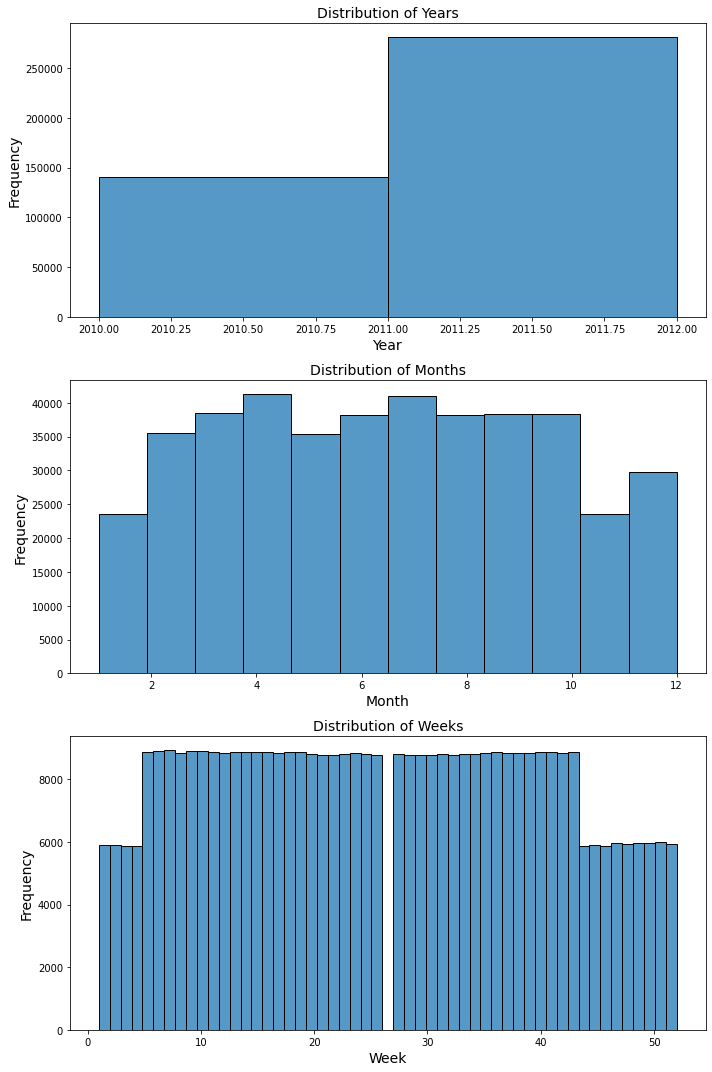

In [67]:
# Create year, month, and week features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Plot distribution of years, months, and weeks
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(df['Year'], bins=range(2010, 2013), kde=False, ax=axes[0])
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Month'], bins=12, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Months')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')

sns.histplot(df['Week'], bins=53, kde=False, ax=axes[2])
axes[2].set_title('Distribution of Weeks')
axes[2].set_xlabel('Week')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

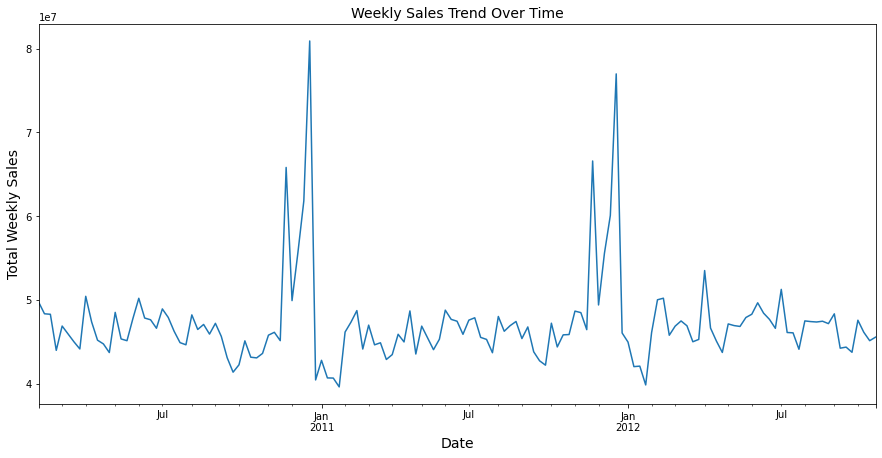

In [68]:
# Plot weekly sales trend over time
fig, ax = plt.subplots(figsize=(15, 7))

df.groupby('Date')['Weekly_Sales'].sum().plot(ax=ax)
ax.set_title('Weekly Sales Trend Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Total Weekly Sales')

plt.show()

The trend chart shows that weekly sales **fluctuate over time**, with certain periods having **significantly higher sales**, especially **during holidays and major events**.

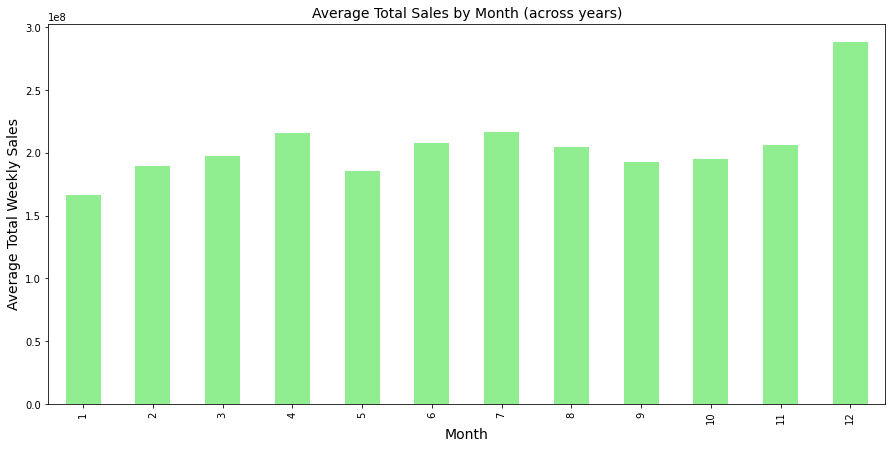

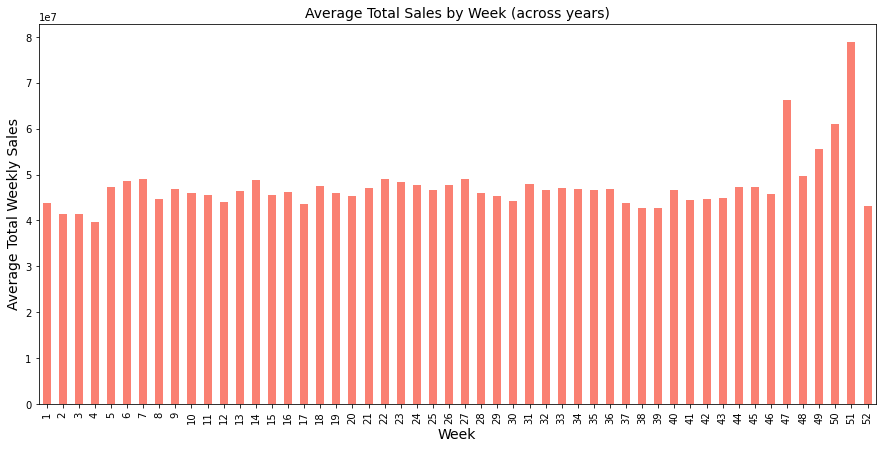

In [69]:
# Calculate average sales by month (accross years)
sales_by_month_year = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum()
sales_by_month_avg = sales_by_month_year.groupby('Month').mean()

# Calculate average sales by week (accross years)
sales_by_week_year = df.groupby(['Year', 'Week'])['Weekly_Sales'].sum()
sales_by_week_avg = sales_by_week_year.groupby('Week').mean()

# Plot average sales by month (accross years)
fig, ax = plt.subplots(figsize=(15, 7))
sales_by_month_avg.plot(kind='bar', ax=ax, color='lightgreen')
ax.set_title('Average Total Sales by Month (across years)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Total Weekly Sales')
plt.show()

# Plot average sales by week (accross years)
fig, ax = plt.subplots(figsize=(15, 7))
sales_by_week_avg.plot(kind='bar', ax=ax, color='salmon')
ax.set_title('Average Total Sales by Week (across years)')
ax.set_xlabel('Week')
ax.set_ylabel('Average Total Weekly Sales')
plt.show()


- The chart reveals a significant increase in sales during November and December. This spike in sales is likely attributed to major holiday shopping periods such as Black Friday, Cyber Monday, and the Christmas season.
- The months of January and February show lower average sales, possibly due to post-holiday spending declines and fewer promotional events.
- Weeks corresponding to major holidays such as Thanksgiving (week 47), Christmas (week 52), and New Year (week 1) exhibit elevated sales figures, reflecting the impact of holiday promotions and consumer behavior.

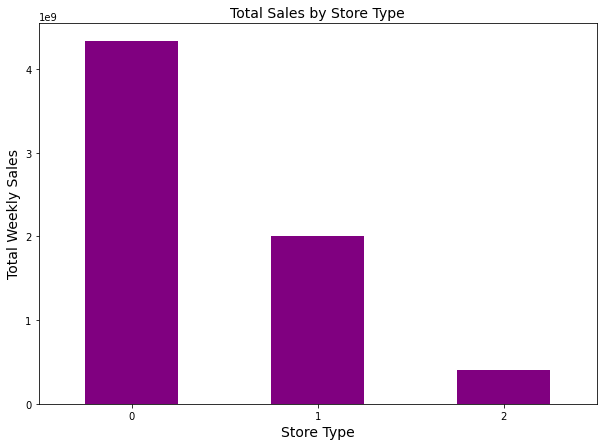

In [70]:
# Plot total sales by store type
sales_by_type = df.groupby('Type')['Weekly_Sales'].sum()

fig, ax = plt.subplots(figsize=(10, 7))
sales_by_type.plot(kind='bar', ax=ax, color='purple')
ax.set_title('Total Sales by Store Type')
ax.set_xlabel('Store Type')
ax.set_ylabel('Total Weekly Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Among the different store types, **Store Type 0 has the highest sales**. This indicates that stores classified under Type 0 are significantly outperforming other store types in terms of total sales.

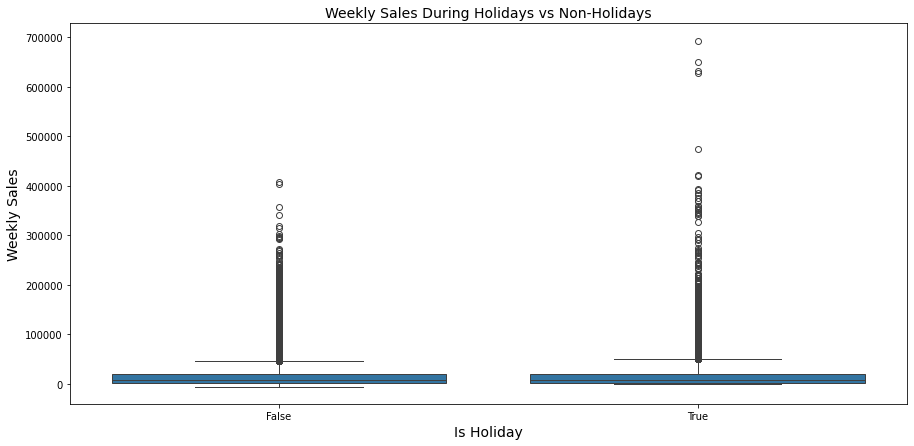

In [71]:
# Plot Weekly Sales During Holidays vs Non-Holidays
fig, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales', ax=ax)
ax.set_title('Weekly Sales During Holidays vs Non-Holidays')
ax.set_xlabel('Is Holiday')
ax.set_ylabel('Weekly Sales')
plt.show()

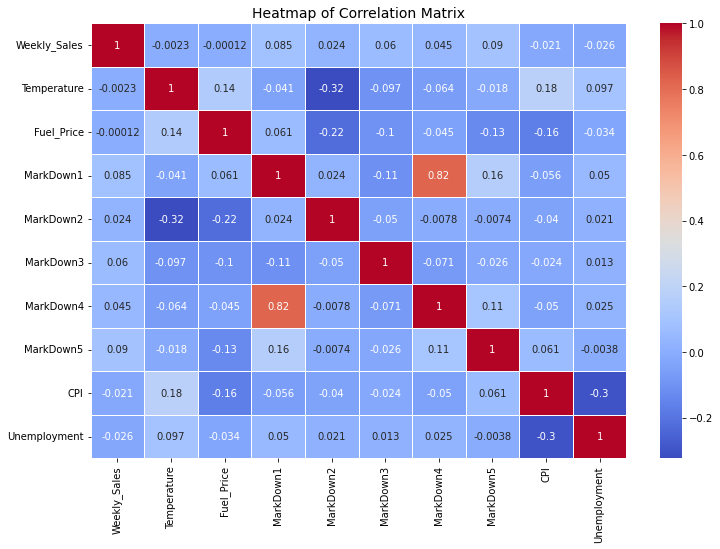

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo ma trận tương quan
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']].corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [73]:
# Check stationary
time_series = df.groupby('Date')['Weekly_Sales'].sum()

from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(time_series)
print("ADF Statistic: ", result[0])
print("p-value: ", result[1])
for key, value in result[4].items():
    print(f"Critical Value {key}: {value:.3f}")

ADF Statistic:  -5.908297957186331
p-value:  2.675979158986058e-07
Critical Value 1%: -3.479
Critical Value 5%: -2.883
Critical Value 10%: -2.578


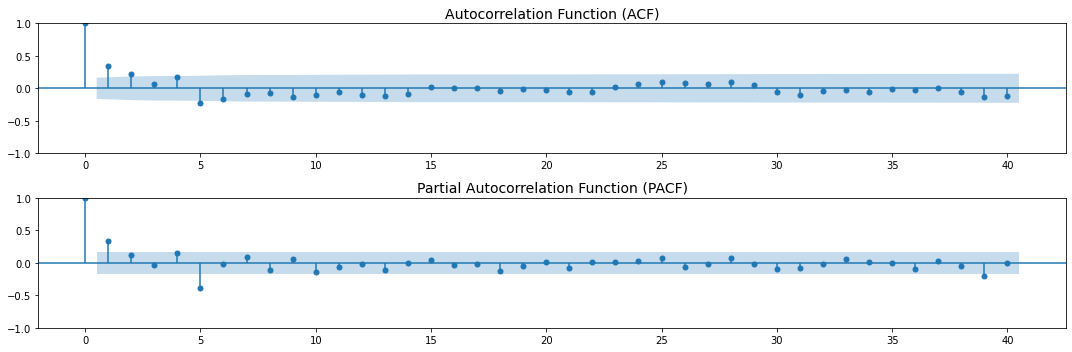

In [74]:
# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plot_acf(time_series, ax = ax[0], lags = 40)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(time_series, ax = ax[1], lags = 40)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

## **Model**

### **ARIMA**

ARIMA(2, 0, 2) - AIC: 4814.786555597639
ARIMA(1, 0, 2) - AIC: 4819.012547368222
ARIMA(2, 0, 1) - AIC: 4826.562921847259
ARIMA(1, 0, 1) - AIC: 4829.8386135011915
Best model: ARIMA(2, 0, 2) - AIC: 4814.786555597639


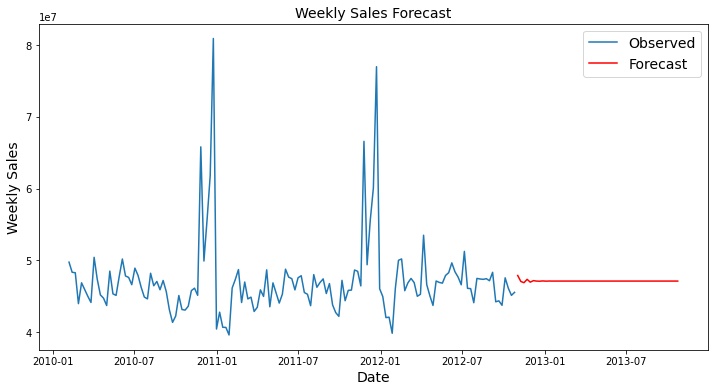

In [75]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Ignore warnings
warnings.filterwarnings("ignore")

# Try different combinations of (p, d, q) values
p = [1, 2]
d = [0]
q = [1, 2]

# Store results
results = []

# Try different combinations of (p, d, q) values
for i in p:
    for j in d:
        for k in q:
            try:
                model = ARIMA(time_series, order=(i, j, k))
                model_fit = model.fit()
                results.append((i, j, k, model_fit.aic))
            except:
                continue

# Display results
results.sort(key=lambda x: x[3])
for result in results:
    print(f'ARIMA({result[0]}, {result[1]}, {result[2]}) - AIC: {result[3]}')

# Select the best model
best_model = results[0]
print(f'Best model: ARIMA({best_model[0]}, {best_model[1]}, {best_model[2]}) - AIC: {best_model[3]}')

# Fit the best model
model = ARIMA(time_series, order=(best_model[0], best_model[1], best_model[2]))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=52)

# Plot the forecast results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


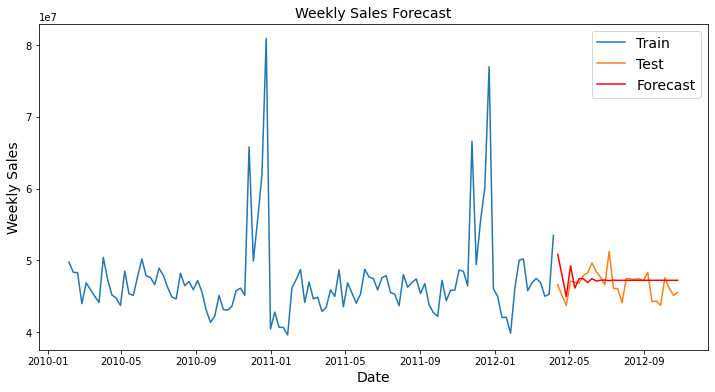

Mean Squared Error: 3810071194632.163
Root Mean Squared Error: 3810071194632.1631
R2 Score: -0.2719


In [76]:
# Split data into training and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Build ARIMA model on training set
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Forecast on test set
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index

# Plot the forecast results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
mse = mean_squared_error(test, forecast)
rmse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')


### **SARIMA**

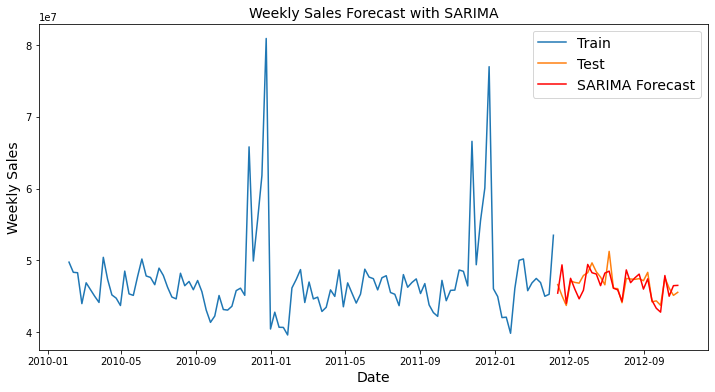

SARIMA Mean Squared Error: 1915025425047.9097
SARIMA Root Mean Squared Error: 1383844.4367
SARIMA R2 Score: 0.3607


In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define parameters for the SARIMA model
# Experiment with seasonal parameters (seasonal) p, d, q, and P, D, Q, s (seasonal period)
seasonal_order = (1, 1, 1, 52)  # P, D, Q, s

# Build SARIMA model on the training set
sarima_model = SARIMAX(train, order=(2, 0, 2), seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast on the test set
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# Plot the forecast results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('Weekly Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Evaluate the SARIMA model
sarima_mse = mean_squared_error(test, sarima_forecast)
sarima_rmse = mean_squared_error(test, sarima_forecast, squared=False)
sarima_r2 = r2_score(test, sarima_forecast)

print(f'SARIMA Mean Squared Error: {sarima_mse}')
print(f'SARIMA Root Mean Squared Error: {sarima_rmse:.4f}')
print(f'SARIMA R2 Score: {sarima_r2:.4f}')

### Prophet

21:23:57 - cmdstanpy - INFO - Chain [1] start processing
21:23:57 - cmdstanpy - INFO - Chain [1] done processing


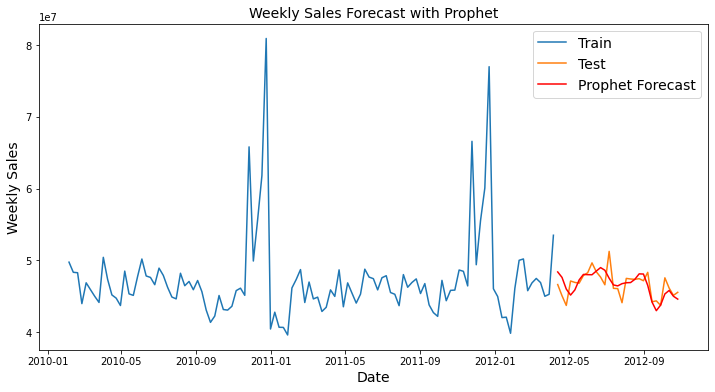

Prophet Mean Squared Error: 2182664796788.211
Prophet Root Mean Squared Error: 1477384.4445
Prophet R2 Score: 0.2714


In [79]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare data for Prophet model
prophet_df = train.reset_index()
prophet_df.columns = ['ds', 'y']

# Create and train the Prophet model on the training set
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Create a time frame for forecasting the test set period
future_test = test.reset_index()
future_test.columns = ['ds', 'y']
future = future_test[['ds']]

# Forecast
prophet_forecast = prophet_model.predict(future)

# Plot the forecast results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='red')
plt.title('Weekly Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Evaluate the Prophet model
prophet_test = prophet_forecast
prophet_mse = mean_squared_error(test, prophet_test['yhat'])
prophet_rmse = mean_squared_error(test, prophet_test['yhat'], squared=False)
prophet_r2 = r2_score(test, prophet_test['yhat'])

print(f'Prophet Mean Squared Error: {prophet_mse}')
print(f'Prophet Root Mean Squared Error: {prophet_rmse:.4f}')
print(f'Prophet R2 Score: {prophet_r2:.4f}')


### **Probabilistic Models**

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

In [86]:
# Fill missing values with IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

itt = IterativeImputer()
markdowns = df[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]
df[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]] = itt.fit_transform(markdowns)


In [92]:
# Drop Date column for training
df = df.drop(columns=['Date'])

# Define features and target
X = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

In [93]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Create and train the Random Forest model on the training set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Forecast on the test set
y_pred = rf.predict(X_test)

Random Forest Mean Squared Error: 13638949.627469057
Random Forest Root Mean Squared Error: 3693.0949
Random Forest R2 Score: 0.9738


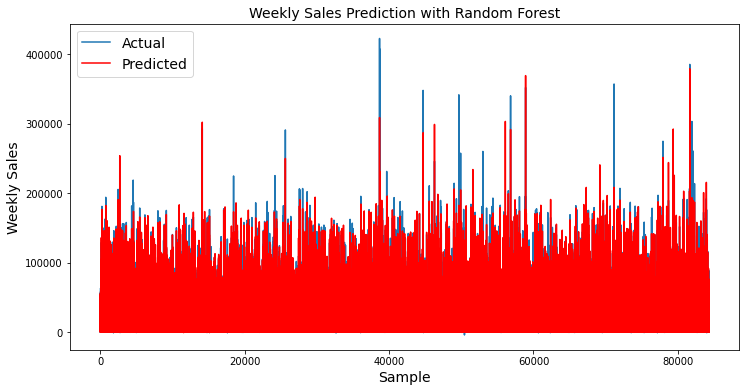

In [95]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Mean Squared Error: {mse}')
print(f'Random Forest Root Mean Squared Error: {rmse:.4f}')
print(f'Random Forest R2 Score: {r2:.4f}')

# Plot the forecast results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Weekly Sales Prediction with Random Forest')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [99]:
classifiers = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

  File "c:\Users\LENOVO\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\LENOVO\anaconda\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\LENOVO\anaconda\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\LENOVO\anaconda\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2528
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 17
[LightGBM] [Info] Start training from score 15979.221909


In [100]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
AdaBoostRegressor,23408.116593,-0.050758,"(DecisionTreeRegressor(max_depth=3, random_sta..."
GradientBoostingRegressor,11612.544390,0.741402,([DecisionTreeRegressor(criterion='friedman_ms...
LGBMRegressor,6826.357048,0.910639,LGBMRegressor()
XGBRegressor,5413.377917,0.943804,"XGBRegressor(base_score=None, booster=None, ca..."
DecisionTreeRegressor,4916.740145,0.953642,DecisionTreeRegressor()
RandomForestRegressor,3719.075300,0.973476,"(DecisionTreeRegressor(max_features=1.0, rando..."
